In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from collections import Counter
import os #this to change working directories
import pandas_profiling
from sklearn.base import clone
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#print(os.getcwd())
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score


In [3]:
df1=pd.read_csv('./data/borrower_table.csv')
df2=pd.read_csv('./data/loan_table.csv')

In [4]:
df1.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [5]:
df2.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [6]:
df= pd.merge(df1,df2,on=['loan_id'], how='inner')

In [7]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [8]:
df.set_index(['loan_id'], inplace=True)

In [9]:
df.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
loan_id,,,,,,,,,,,,,,,
289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN


In [10]:
#Datacleaning
df["loan_repaid"].isnull().sum()

53446

In [11]:
df.dropna(subset=["loan_repaid"], inplace=True)

Positive examples = 30706
Negative examples = 16948
Proportion of positive to negative examples = 55.19%


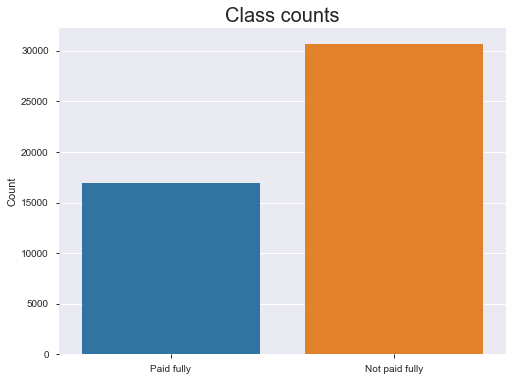

In [12]:
# Get number of positve and negative examples
pos = df[df["loan_repaid"] == 1].shape[0]
neg = df[df["loan_repaid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(neg/pos) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["loan_repaid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [13]:
#Drop Loan_granted and Date?
df.drop(["loan_granted","date"], axis='columns', inplace=True)

In [14]:
#list of conditions(1=Other, 2=Emergency_funds, 3=Business, 4= Home, 5= Investment)
conditions = [
    (df['loan_purpose'] == "other"),
    (df['loan_purpose'] == "emergency_funds"),
    (df['loan_purpose'] == "business"),
    (df['loan_purpose'] == "home"),
    (df['loan_purpose'] == "investment"),
    ]

In [15]:
# create a list of the values we want to assign for each condition
values = [1, 2, 3, 4, 5]

In [16]:
# create a new column and use np.select to assign values to it using our lists as arguments
df['loan_purpose'] = np.select(conditions, values)

In [17]:
#Fill NA
df['fully_repaid_previous_loans'] = df['fully_repaid_previous_loans'].fillna(0)
df['currently_repaying_other_loans'] = df['currently_repaying_other_loans'].fillna(0)
df['avg_percentage_credit_card_limit_used_last_year'] = df['avg_percentage_credit_card_limit_used_last_year'].fillna(0)


In [18]:
#Change to integers only
#df.astype(int)
df.loan_repaid = df.loan_repaid.apply(int) # round instead of int is you prefer to round
df.fully_repaid_previous_loans = df.fully_repaid_previous_loans.apply(int) 
df.currently_repaying_other_loans = df.currently_repaying_other_loans.apply(int) 

df

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,loan_repaid
loan_id,,,,,,,,,,,,,
135565,1,0,0,6900,0.82,2085,3422,1,24500,38,8,1,1
423171,1,0,0,6100,0.53,6163,5298,1,29500,24,1,1,1
200139,1,0,0,4000,0.57,602,2757,1,31700,36,8,3,0
991294,0,1,0,7000,0.52,2575,2917,1,58900,33,3,2,1
875332,0,1,0,4300,0.83,722,892,1,5400,32,7,3,1
954215,1,0,0,7000,0.64,2113,5589,0,0,40,2,3,1
778076,1,0,0,4900,0.60,460,4297,1,26600,53,3,3,1
73441,0,1,0,3900,0.77,989,1547,1,45700,29,4,2,1
249377,1,0,0,5500,0.59,1154,2731,1,9300,51,2,3,1


In [19]:
df = df[["loan_repaid", "is_first_loan", "fully_repaid_previous_loans", "currently_repaying_other_loans", "total_credit_card_limit", "avg_percentage_credit_card_limit_used_last_year", "saving_amount" ,"checking_amount", "is_employed" ,"yearly_salary", "age", "dependent_number", "loan_purpose"]]

In [20]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,loan_repaid,6.332592
1,is_first_loan,8.904897
2,fully_repaid_previous_loans,7.074070
3,currently_repaying_other_loans,1.545017
4,total_credit_card_limit,7.440752
5,avg_percentage_credit_card_limit_used_last_year,11.131373
6,saving_amount,3.707726
7,checking_amount,4.725252
8,is_employed,14.974753
9,yearly_salary,6.933106


In [22]:
#Drop Loan_granted and Date?
#df.drop(["is_employed", "avg_percentage_credit_card_limit_used_last_year", "fully_repaid_previous_loans", "currently_repaying_other_loans"], axis='columns', inplace=True)


df.drop(["is_employed", "avg_percentage_credit_card_limit_used_last_year", "fully_repaid_previous_loans"], axis='columns', inplace=True)

C:\Users\halvo\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,loan_repaid,6.172023
1,is_first_loan,2.458363
2,currently_repaying_other_loans,1.469210
3,total_credit_card_limit,6.458093
4,saving_amount,3.651614
5,checking_amount,4.599699
6,yearly_salary,4.836476
7,age,6.987127
8,dependent_number,2.789327


In [24]:
#Predictive machine learning model

In [25]:
X = df.copy(deep=True)

In [26]:
y = X.pop('loan_repaid')
count = y.count()
print(np.count_nonzero(y < 1))
print(np.count_nonzero(y >= 1))

16948
30706


Text(0.5, 1, 'Heatmap of correlation')

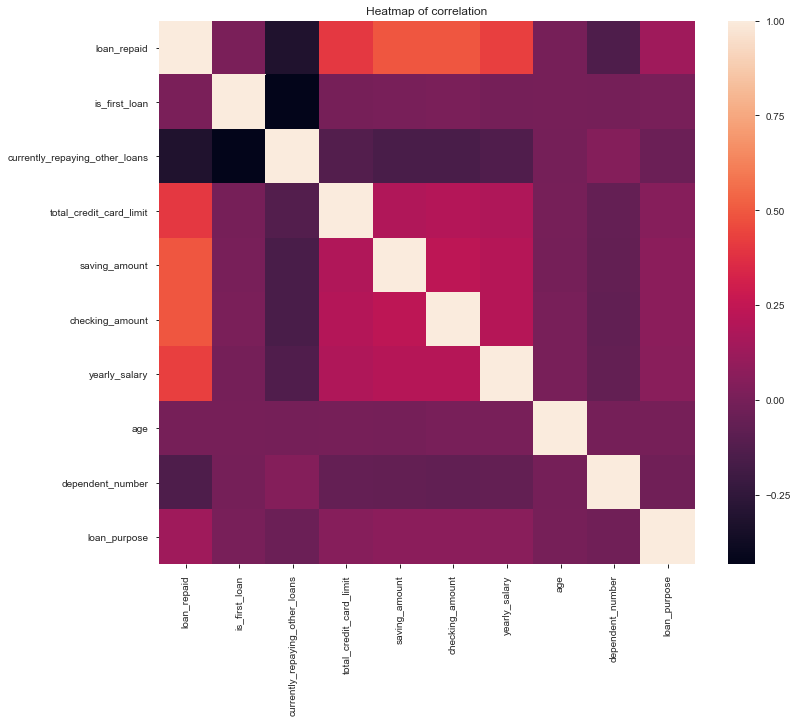

In [27]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat=sns.heatmap(data=corr)
plt.title('Heatmap of correlation')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size = .20)

In [29]:
count = y_train.count()
print(np.count_nonzero(y_train < 1))
print(np.count_nonzero(y_train >= 1))

13513
24610


In [30]:
#SMOTE resmapling
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print('smote target shape %s' % Counter(y_resampled))

smote target shape Counter({0: 24610, 1: 24610})


In [31]:
X_resampled, X_val, y_resampled, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42)

# CREATE THE MODEL

In [31]:
model = DecisionTreeClassifier(random_state=42).fit(X_resampled, y_resampled)
y_pred= model.predict(X_val)
print("Accurcay",accuracy_score(y_val, y_pred))
print("Precision", precision_score(y_val, y_pred))
print("Recall",recall_score(y_val, y_pred))
print("F1 score",f1_score(y_val, y_pred))

Accurcay 0.8972775294595693
Precision 0.8986257073565077
Recall 0.8971751412429378
F1 score 0.8978998384491115


# Findig alpha

In [30]:
model = DecisionTreeClassifier(criterion="gini", random_state=42).fit(X_resampled, y_resampled)

In [43]:
path = model.cost_complexity_pruning_path(X_resampled, y_resampled)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts =[]

for ccp_alpha in ccp_alphas:
    clf_dt= DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_resampled, y_resampled)
    clf_dts.append(clf_dt)

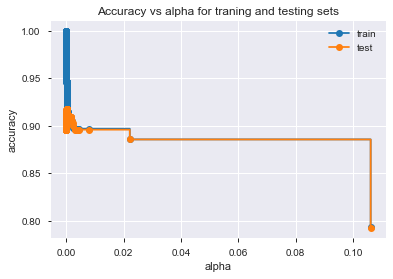

In [44]:
train_scores = [clf_dt.score(X_resampled, y_resampled) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_val, y_val) for clf_dt in clf_dts]

fix, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for traning and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Hyperparameters tuning

In [45]:
model = DecisionTreeClassifier(random_state=42)

In [46]:
param_dict={
    "criterion":["gini","entropy"],
    "max_depth": range(1,10),
    "min_samples_split": range(2,10),
    "min_samples_leaf":range(1,5),
    "ccp_alpha":np.arange(0,0.0001 , 0.00001).tolist()

}
#"min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1"

In [51]:
grid=GridSearchCV(model, 
                 param_grid=param_dict,
                 cv=10,
                 verbose=1,
                 n_jobs=-1)
grid.fit(X_resampled,y_resampled)

Fitting 10 folds for each of 5760 candidates, totalling 57600 fits


KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [37]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=7.000000000000001e-05, max_depth=9,
                       random_state=42)

In [38]:
grid.best_score_

0.9176554246241364

In [36]:
# Initialize our decision tree object
model = DecisionTreeClassifier(criterion="gini",
                               ccp_alpha= 0.00007,
                               max_depth= 9,
                               min_samples_leaf= 1,
                               min_samples_split= 2,
                               random_state=42)

In [37]:
# Train our decision tree (tree induction + pruning)
clf= model.fit(X_resampled, y_resampled)
print("Accuracy on training set: {:.3f}".format(model.score(X_resampled,y_resampled)))

Accuracy on training set: 0.929


# Feature Importance

Feature: 0, Score: 0.00058
Feature: 1, Score: 0.00043
Feature: 2, Score: 0.00228
Feature: 3, Score: 0.04929
Feature: 4, Score: 0.00760
Feature: 5, Score: 0.52519
Feature: 6, Score: 0.31200
Feature: 7, Score: 0.00191
Feature: 8, Score: 0.09018
Feature: 9, Score: 0.00060
Feature: 10, Score: 0.00149
Feature: 11, Score: 0.00846


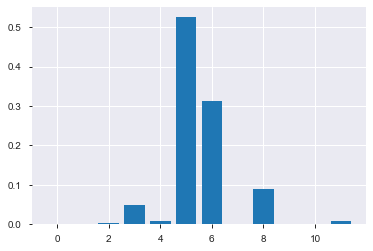

In [35]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<BarContainer object of 12 artists>

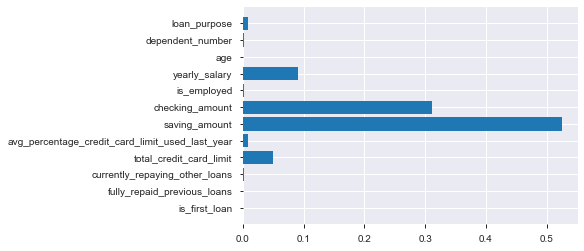

In [36]:
clf_feature_names = list(X.columns)
plt.barh(clf_feature_names, clf.feature_importances_)

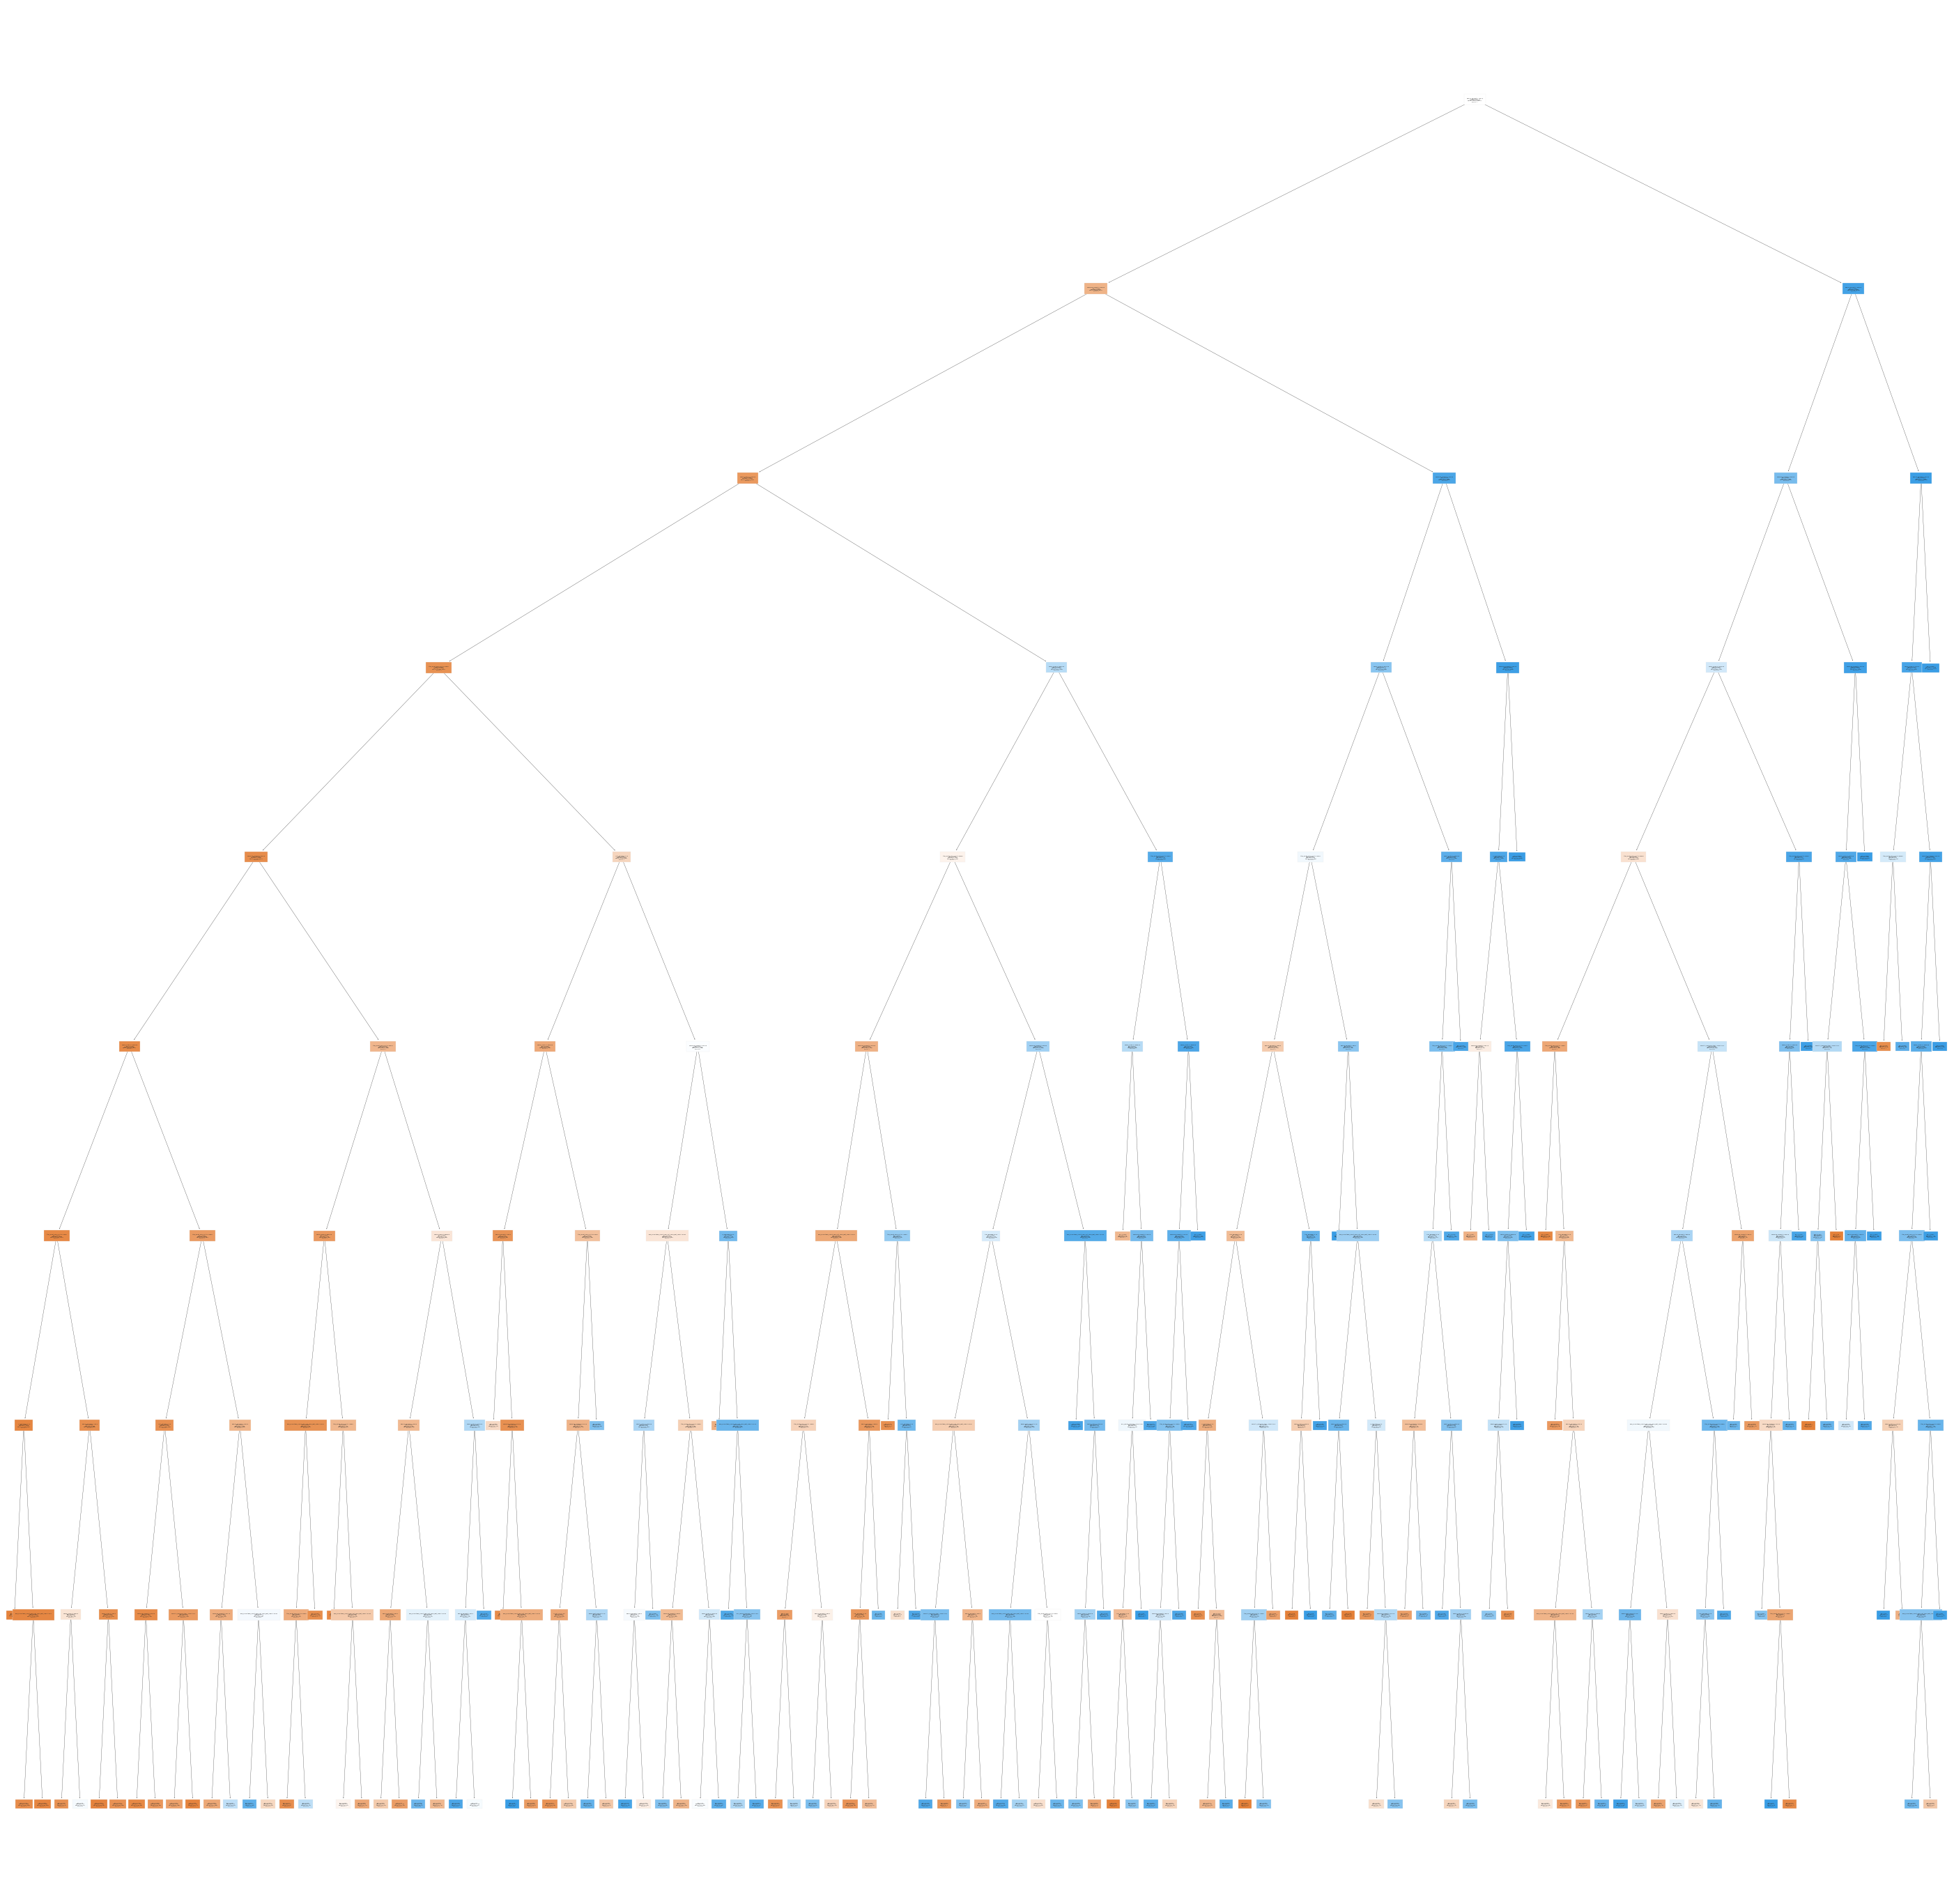

In [37]:
fig = plt.figure(figsize=(50,50))
clf_feature_names = list(X.columns)
clf_target_names = [str(s) for s in y.unique()]
_ = tree.plot_tree(clf, filled=True,
                   feature_names=clf_feature_names,
                   class_names = clf_target_names,
                   fontsize=2)

# Validation data

In [38]:
y_pred= model.predict(X_val)

In [39]:
print("Accurcay",accuracy_score(y_val, y_pred))
print("Precision", precision_score(y_val, y_pred))
print("Recall",recall_score(y_val, y_pred))
print("F1 score",f1_score(y_val, y_pred))

Accurcay 0.914018691588785
Precision 0.9472401184050148
Recall 0.8781275221953188
F1 score 0.9113754397721561


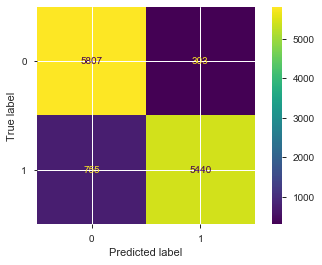

In [40]:
plot_confusion_matrix(model, X_val, y_val)

# Testdata with tuning

In [38]:
# Initialize our decision tree object
model = DecisionTreeClassifier(criterion="gini",
                               ccp_alpha= 0.00007,
                               max_depth= 9,
                               min_samples_leaf= 1,
                               min_samples_split= 2,
                               random_state=42)
clf= model.fit(X_resampled, y_resampled)

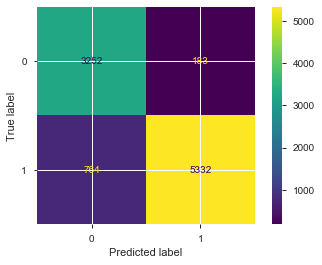

In [39]:
plot_confusion_matrix(model, X_test, y_test)


In [40]:
# predict the test data
y_pred= model.predict(X_test)

In [41]:
print("Accurcay",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accurcay 0.9006400167873255
Precision 0.9668177697189483
Recall 0.8746719160104987
F1 score 0.9184394109034536


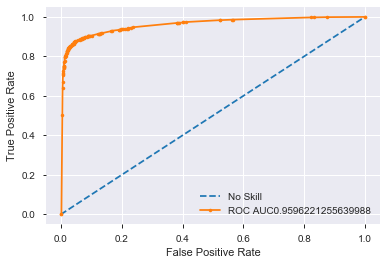

In [44]:
# predict probabilities
yhat = model.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
roc_auc = metrics.roc_auc_score(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='ROC AUC' +str(roc_auc))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()